In [1]:
%matplotlib inline
# The Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
rides_data = pd.merge(city_data, ride_data, how="left", on="city")
# Display the data table for preview
rides_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#All values needed for this work are here, there are a few extra values for future reference
tot_fares = rides_data.groupby('type')['fare'].sum()
tot_drivers = rides_data.groupby('type')['driver_count'].count()
avg_fare = rides_data.groupby('city')['fare'].mean()
tot_rides = rides_data.groupby('city')['ride_id'].count()
tot_fares = rides_data.groupby('type')['fare'].sum()
rides_data['avg_fare'] = rides_data['city'].map(avg_fare)
rides_data['tot_rides'] = rides_data['city'].map(tot_rides)
rides_data['tot_fares'] = rides_data['type'].map(tot_fares)
rides_data.tail()


,city,driver_count,type,date,fare,ride_id,avg_fare,tot_rides,tot_fares
2370,Jessicaport,1,Rural,2018-01-31 17:57:25,58.29,623154556195,36.013333,6,4327.93
2371,South Saramouth,7,Rural,2018-02-20 16:32:36,44.29,3622365199969,36.160000,4,4327.93
2372,South Saramouth,7,Rural,2018-01-28 15:55:33,31.25,7118046558393,36.160000,4,4327.93
2373,South Saramouth,7,Rural,2018-03-27 21:07:16,11.87,170351888128,36.160000,4,4327.93
2374,South Saramouth,7,Rural,2018-04-12 18:11:50,57.23,5081198789583,36.160000,4,4327.93


In [3]:
#City type information and other definitions are here
urbans = rides_data.loc[rides_data['type']=='Urban']
suburbans = rides_data.loc[rides_data['type']=='Suburban']
rural = rides_data.loc[rides_data['type']=='Rural']


## Bubble Plot of Ride Sharing Data

<function matplotlib.pyplot.show(*args, **kw)>

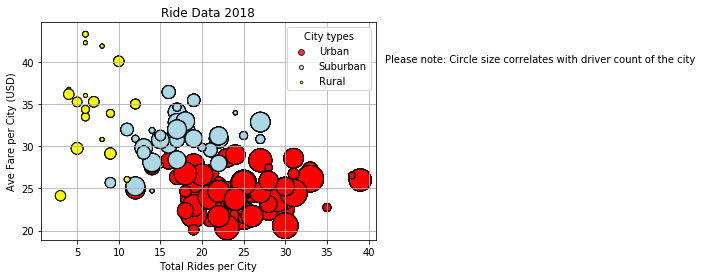

In [4]:
plt.scatter(urbans['tot_rides'],urbans['avg_fare'],s = urbans['driver_count']*10, marker='o',color ='red', edgecolors='black', alpha =0.8, label = 'Urban')
plt.scatter(suburbans['tot_rides'],suburbans['avg_fare'],s = suburbans['driver_count']*15, marker='o',color ='lightblue', edgecolors='black', alpha =0.8, label = 'Suburban')
plt.scatter(rural['tot_rides'],rural['avg_fare'],s = rural['driver_count']*15, marker='o',color ='yellow', edgecolors='black', alpha =0.8, label = 'Rural')

plt.title('Ride Data 2018')
plt.xlabel('Total Rides per City')
plt.ylabel('Ave Fare per City (USD)')

plt.legend(title='City types', loc = 'upper right', markerscale = 0.3)

plt.text(42,40,'Please note: Circle size correlates with driver count of the city')
plt.grid()

#Save to File
plt.savefig("ridesharing_Fig01.jpg")
plt.show

In [5]:
# This is space junk! (kept it here as alternative just in case)
#rides_data = rides_data.drop(['date', 'ride_id',], axis=1).drop_duplicates().set_index('city')
#rides_data.tail()
# Obtain the x and y coordinates for each of the three city types
#x_axis = np.arange(len(rides_data))
#X_axis = rides_data['type']
#y_axis = rides_data['tot_rides'] #av fare
#plt.scatter(x_axis, y_axis, s=rides_data['driver_count'], )
#plt.show()

## Total Fares by City Type

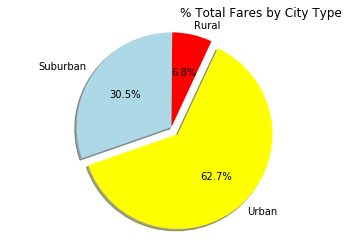

In [6]:
#the percentages  All values are defined previously
explode=[0,0,0.1]
tot_fares.index

plt.pie(tot_fares,explode=explode,labels=tot_fares.index,colors=['red','lightblue','yellow'], shadow=True,startangle= 65,autopct = '%1.1f%%')

plt.title('% Total Fares by City Type',loc='right')
plt.axis('equal')

plt.savefig('FaresbyCityType01.jpg')
plt.show()


In [7]:
tot_rides_type = rides_data.groupby('type')['ride_id'].count()
tot_rides_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

## Total Rides by City Type

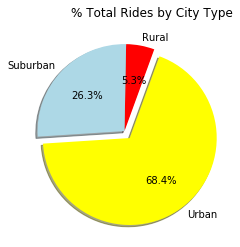

In [8]:
# Calculate Ride Percents  Values are previously defined. see above 


tot_rides_type = rides_data.groupby('type')['ride_id'].count()
explode=[0,0,0.1]

# Build Pie Chart
plt.pie(tot_rides_type,explode=explode,labels=['Rural','Suburban','Urban'],colors=['red','lightblue','yellow'], shadow=True,startangle= 70,autopct = '%1.1f%%')
plt.title('% Total Rides by City Type',loc='right')
#plt.axis('equal')


# Save Figure
plt.savefig('RidesbyType01.jpg')
plt.show()

## Total Drivers by City Type

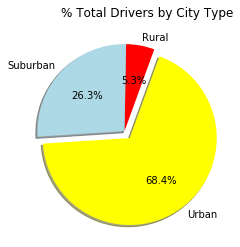

In [9]:
# Calculate Driver Percents: again all values defined previously 
explode=[0,0,0.1]

# Build Pie Charts
plt.pie(tot_drivers,explode=explode,labels=['Rural','Suburban','Urban'],colors=['red','lightblue','yellow'], shadow=True,startangle= 70,autopct = '%1.1f%%')
plt.title('% Total Drivers by City Type',loc='right')
# Save Figure
plt.savefig('DriversbyType01.jpg')
plt.show()